In [1]:
import pandas as pd
data = pd.read_csv('fakebanknotesdata.csv')
#i can dothis because i have uploaded into Jupyter

print(data)



            V1        V2
0     3.621600   8.66610
1     4.545900   8.16740
2     3.866000  -2.63830
3     3.456600   9.52280
4     0.329240  -4.45520
5     4.368400   9.67180
6     3.591200   3.01290
7     2.092200  -6.81000
8     3.203200   5.75880
9     1.535600   9.17720
10    1.224700   8.77790
11    3.989900  -2.70660
12    1.899300   7.66250
13   -1.576800  10.84300
14    3.404000   8.72610
15    4.676500  -3.38950
16    2.671900   3.06460
17    0.803550   2.84730
18    1.447900  -4.87940
19    5.242300  11.02720
20    5.786700   7.89020
21    0.329200  -4.45520
22    3.936200  10.16220
23    0.935840   8.88550
24    4.433800   9.88700
25    0.705700  -5.49810
26    1.143200  -3.74130
27   -0.382140   8.39090
28    6.563300   9.81870
29    4.890600  -3.35840
...        ...       ...
1342 -1.747900  -5.82300
1343 -0.959230  -6.71280
1344  1.345100   0.23589
1345  2.227900   4.09510
1346  1.257200   4.87310
1347 -5.385700   9.12140
1348 -2.978600   2.34450
1349 -1.585100  -2.15620


In [9]:
#now i want to find the mean and standard deviation
import numpy as np

V1_mean = np.mean(data['V1'])
V2_mean = np.mean(data['V2'])

V1_st_dev = np.std(data['V1'])
V2_st_dev = np.std(data['V2'])
print(V1_mean,V1_st_dev)
print(V2_mean,V2_st_dev)

0.43373525728862977 2.841726405206097
1.9223531209912539 5.866907488271993


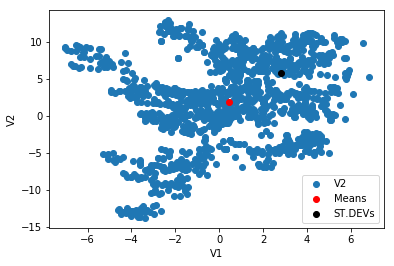

In [10]:
#now i will plot 
import matplotlib.pyplot as plt 
plt.xlabel('V1')
plt.ylabel('V2')
plt.scatter(data.V1,data.V2)


plt.scatter(V1_mean, V2_mean, color = "red", label = "Means")
plt.scatter(V1_st_dev, V2_st_dev, color = "black", label = "St.Devs")
plt.legend()


plt.show()


           V1        V2
0     3.62160   8.66610
1     4.54590   8.16740
2     3.86600  -2.63830
3     3.45660   9.52280
4     0.32924  -4.45520
...       ...       ...
1367  0.40614   1.34920
1368 -1.38870  -4.87730
1369 -3.75030 -13.45860
1370 -3.56370  -8.38270
1371 -2.54190  -0.65804

[1372 rows x 2 columns]


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


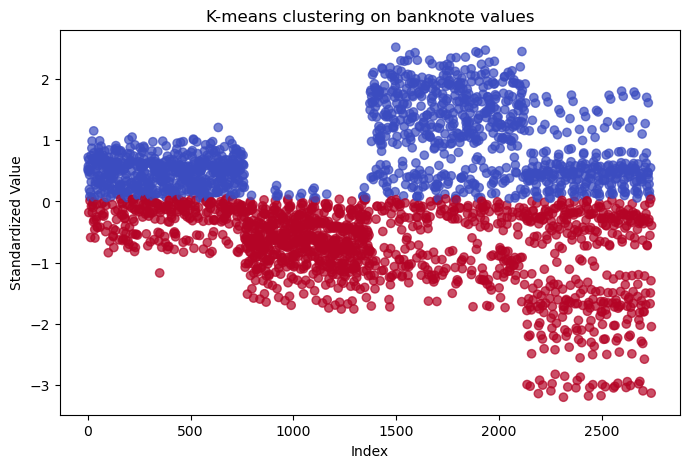

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


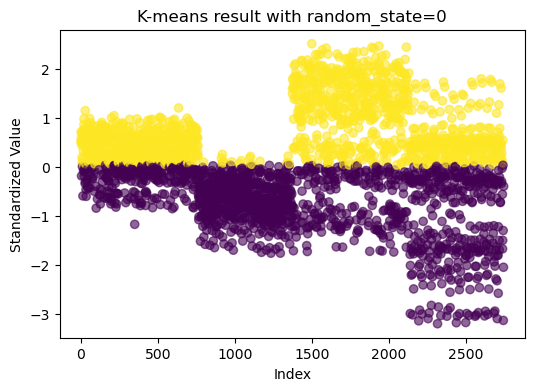

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


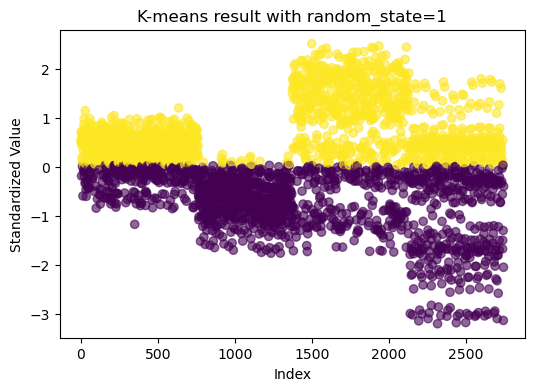

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


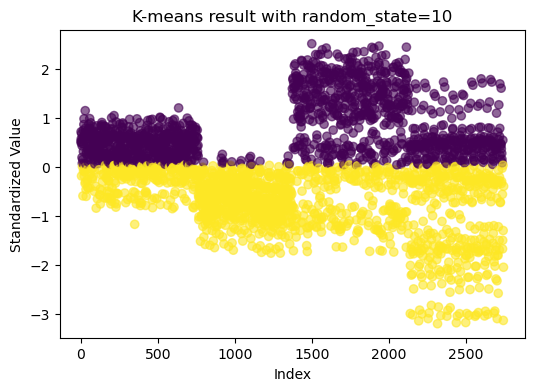

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


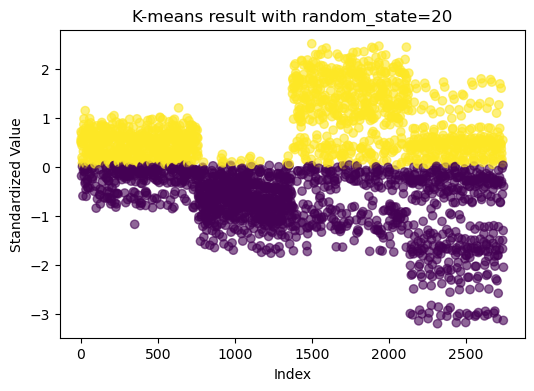

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


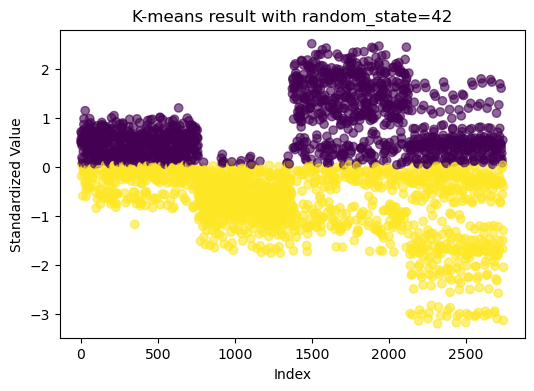

In [15]:
#we try k.means for Week 5 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

data = pd.read_csv('fakebanknotesdata.csv')
#i can do this because i have uploaded into Jupyter
print(data)

# Melt into one long column of values with a label column
real = pd.DataFrame({'value': data['V1'], 'label': 0})  # 0 = real
fake = pd.DataFrame({'value': data['V2'], 'label': 1})  # 1 = fake

# Combine them into one dataset
df = pd.concat([real, fake], ignore_index=True)

# Extract only the value column for clustering
X = df[['value']]  # KMeans needs a 2D array
#in python 1 column is a 2D array

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
#this creates KMeans object from scikit's library
#n = 2 means group my data into 2 clusters because i expect
#2 clusters = real and fake
#random_state=42 means this is the random seed for reproducibility
#K-means starts by choosing random initial points ("centroids").
#By fixing the random state, you make sure you get 
#the same result every time you run the code.

df['cluster'] = kmeans.fit_predict(X_scaled)
#fit_predict(X_scaled):
#fit(...) means: find clusters in the data.
#predict(...) means: assign each point to a cluster.
#This method does both at once.

#df['cluster'] = ...: This creates a new column 
#in your DataFrame called "cluster" that stores the result.


#now we *visualize* the clusters
plt.figure(figsize=(8, 5))
plt.scatter(range(len(X_scaled)), X_scaled, c=df['cluster'], cmap='coolwarm', alpha=0.7)
plt.title("K-means clustering on banknote values")
plt.xlabel("Index")
plt.ylabel("Standardized Value")
plt.show()

#rerun the K-means multiple times
for seed in [0, 1, 10, 20, 42]:
    kmeans = KMeans(n_clusters=2, random_state=seed)
    df['cluster'] = kmeans.fit_predict(X_scaled)

    plt.figure(figsize=(6, 4))
    # six and four is literally the size of the figure
    plt.scatter(range(len(X_scaled)), X_scaled, c=df['cluster'], cmap='viridis', alpha=0.6)
    #range(len(X_scaled) is creating numbers from number of rows. here this means i have more than 2500 rows
    #cmap is a color scheme chooser
    #c=df['cluster']: color each point by which cluster it was assigned to (0 or 1)
    plt.title(f"K-means result with random_state={seed}")
    plt.xlabel("Index")
    plt.ylabel("Standardized Value")
    plt.savefig(f"kmeans_result_seed_{seed}.png", dpi=300, bbox_inches='tight')
    plt.show()




In [12]:
# Compare clusters to true labels
score1 = accuracy_score(df['label'], df['cluster'])
score2 = accuracy_score(df['label'], 1 - df['cluster'])  # in case labels are flipped

print("Best clustering accuracy:", max(score1, score2))

Best clustering accuracy: 0.5856413994169096


In [16]:
import os
os.getcwd()

'/var/www/filebrowser/.projects/1ecec7b6-0552-47c4-b2f0-63fc74cf0a9b'